In [25]:
import obspy
import os
import pickle
import datetime
import seisbench
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from picks_comparison import Picks_Comparison
import warnings
warnings.filterwarnings('ignore')


In [26]:
start_year_analysis = 2012
start_day_analysis = 1
end_year_analysis = 2012
end_day_analysis = 31
time_lag_threshold = 2000

picks_obj = Picks_Comparison (start_year_analysis, 
                start_day_analysis,
                end_year_analysis,
                end_day_analysis)

all_dists_p, all_dists_s = picks_obj()

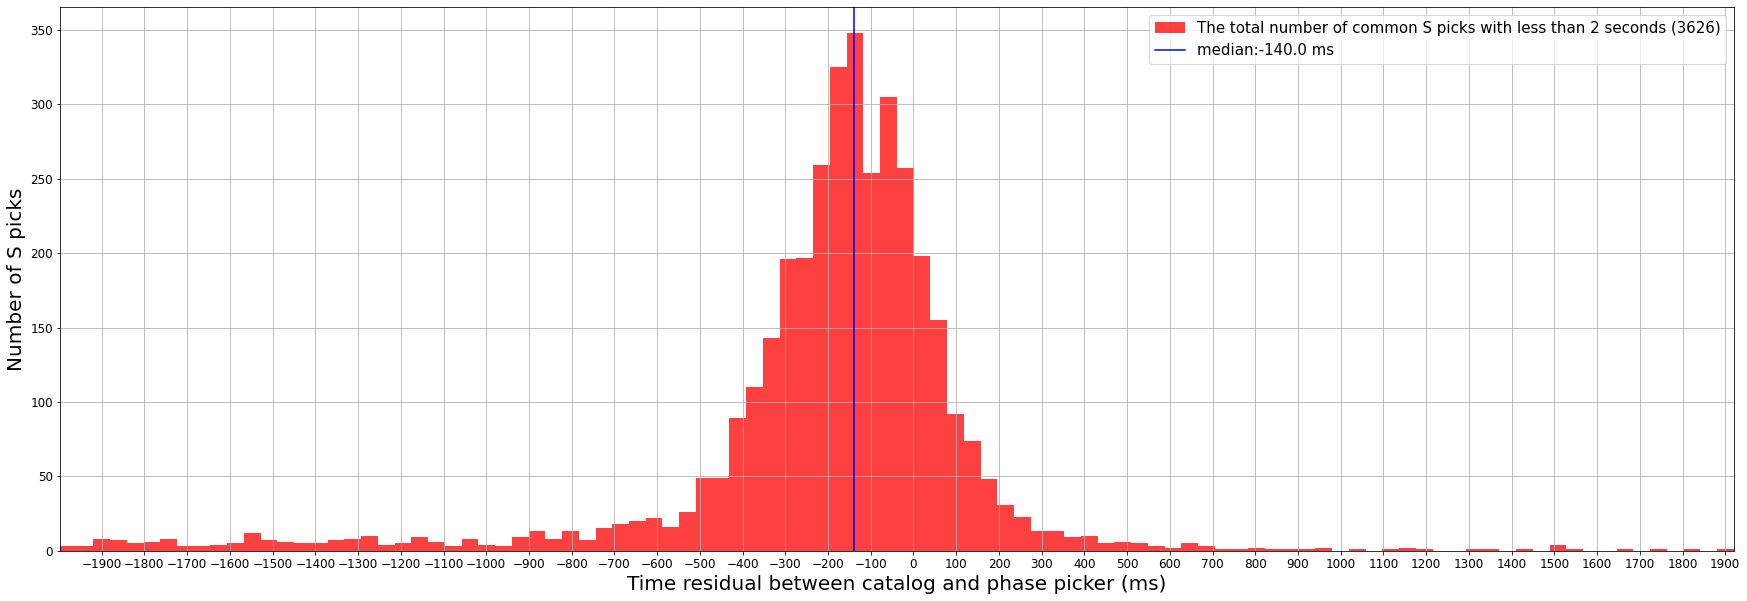

In [38]:
# Filter the time lag with the given threshold and capture the picks with more than 2 second time lag
dists_filter_lag_time_m=all_dists_s[np.abs(all_dists_s) < time_lag_threshold]

# Perform S picks Quality control of PhaseNet by using existing S picks catalog with more than a given time lag
fig_lag_m, ax_lag_m = plt.subplots(figsize=(30,10))

label_more = '{0}{1}{2}'.format('The total number of common S picks with less than 2 seconds (', dists_filter_lag_time_m.shape[0], ')')

n_lag_m, bins_lag_m, patches_lag_m = ax_lag_m.hist(dists_filter_lag_time_m, 100, density=False, facecolor='r', alpha=0.75, label=label_more)
#steps = (max(dists_filter_lag_time_m) - min(dists_filter_lag_time_m))/40
steps = 100
#plt.xticks(np.arange(min(dists_filter_lag_time_m), max(dists_filter_lag_time_m), step=steps))
plt.xticks(np.arange(-2000, 2000, step=steps))
plt.xlabel('Time residual between catalog and phase picker (ms)', fontsize=20)
plt.ylabel('Number of S picks', fontsize=20)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.axvline(np.median(dists_filter_lag_time_m), color='blue', label='median:'+str(round (np.median(dists_filter_lag_time_m),3))+ ' ms')


#plt.title('Common S picks distribution with less than 2 seconds time residual (2012-01-01 to 2012-12-31)', fontsize=24, pad=23)
plt.xlim(min(bins_lag_m), max(bins_lag_m))
plt.grid(True)
plt.legend(loc='upper right', fontsize=15)
plt.show()


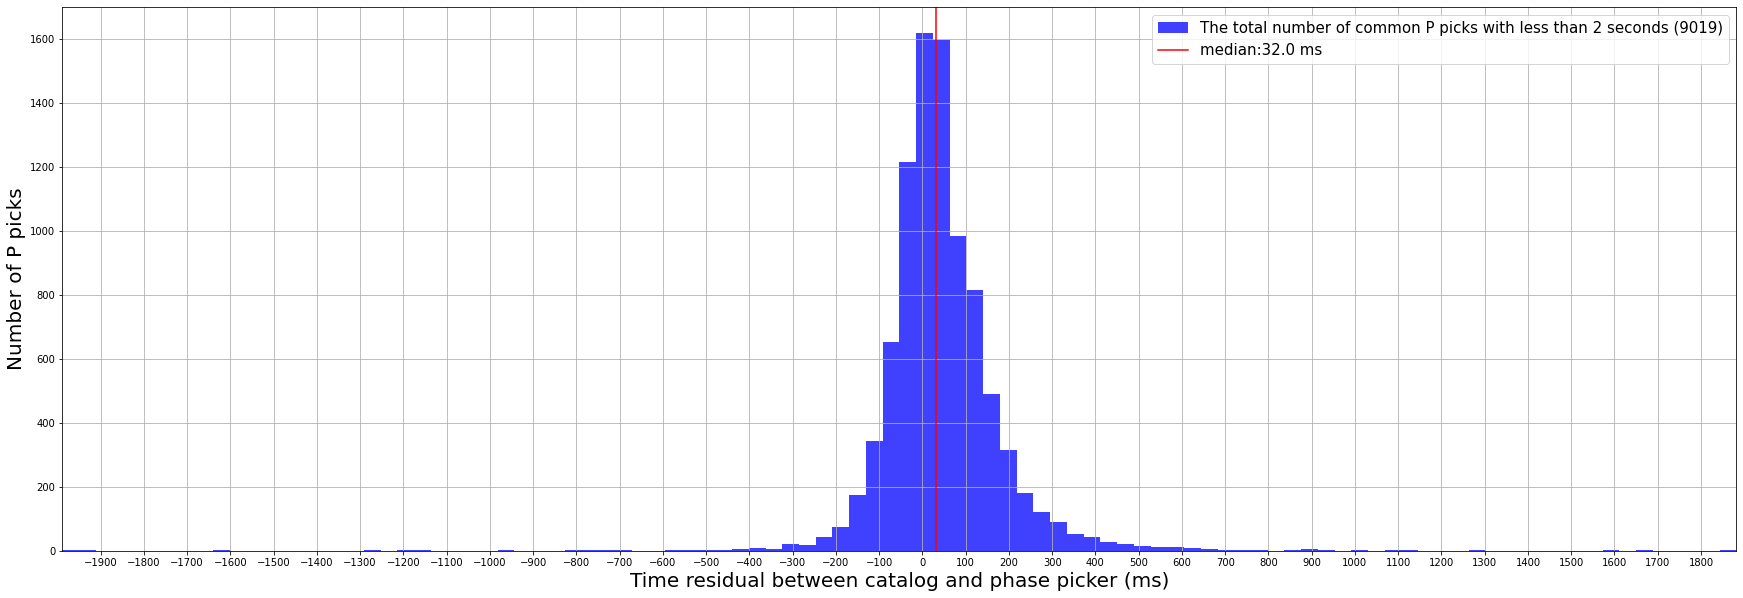

In [37]:
# Filter the time lag with the given threshold and capture the picks with more than 2 second time lag
dists_filter_lag_time_m=all_dists_p[np.abs(all_dists_p) < time_lag_threshold]

# Perform S picks Quality control of PhaseNet by using existing S picks catalog with more than a given time lag
fig_lag_m, ax_lag_m = plt.subplots(figsize=(30,10))

label_more = '{0}{1}{2}'.format('The total number of common P picks with less than 2 seconds (', dists_filter_lag_time_m.shape[0], ')')

n_lag_m, bins_lag_m, patches_lag_m = ax_lag_m.hist(dists_filter_lag_time_m, 100, density=False, facecolor='blue', alpha=0.75, label=label_more)
#steps = (max(dists_filter_lag_time_m) - min(dists_filter_lag_time_m))/20
#plt.xticks(np.arange(min(dists_filter_lag_time_m), max(dists_filter_lag_time_m), step=steps))
steps = 100
plt.xticks(np.arange(-2000, 2000, step=steps))
plt.xlabel('Time residual between catalog and phase picker (ms)', fontsize=20)
plt.ylabel('Number of P picks', fontsize=20)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.axvline(np.median(dists_filter_lag_time_m), color='r', label='median:'+str(round (np.median(dists_filter_lag_time_m),3))+ ' ms')

#plt.title('Common P picks distribution with less than 2 seconds time residual (2012-01-01 to 2012-12-31)', fontsize=24, pad=23)
plt.xlim(min(bins_lag_m), max(bins_lag_m))
plt.grid(True)
plt.legend(loc='upper right', fontsize=15)
plt.show()